In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scrublet as scr
import celltypist
from celltypist import models
import decoupler as dc
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=150)

# Import raw files

In [2]:
inpath="/home/lugli/spuccio/Projects/SP039/FileH5AD_input/"

In [3]:
KSO07_BRM112_GEX = sc.read(inpath+"KSO07_BRM112_GEX.h5ad")
KSO07_BRM112_PBMCs_GEX = sc.read(inpath+"KSO07_BRM112_PBMCs_GEX.h5ad")
KSO07_BRM125_GEX = sc.read(inpath+"KSO07_BRM125_GEX.h5ad")
KSO07_BRM125_PBMCs_GEX = sc.read(inpath+"KSO07_BRM125_PBMCs_GEX.h5ad")
KSO07_BrM138_GEX = sc.read(inpath+"KSO07_BrM138_GEX.h5ad")
KSO07_BrM138_PBMCs_GEX = sc.read(inpath+"KSO07_BrM138_PBMCs_GEX.h5ad")
KSO07_BRM139_GEX = sc.read(inpath+"KSO07_BRM139_GEX.h5ad")
KSO07_BRM139_PBMCs_GEX = sc.read(inpath+"KSO07_BRM139_PBMCs_GEX.h5ad")
KSO07_BRM141_GEX = sc.read(inpath+"KSO07_BRM141_GEX.h5ad")
KSO07_BRM141_PBMCs_GEX = sc.read(inpath+"KSO07_BRM141_PBMCs_GEX.h5ad")
KSO07_BRM143_GEX = sc.read(inpath+"KSO07_BRM143_GEX.h5ad")
KSO07_BRM143_PBMCs_GEX = sc.read(inpath+"KSO07_BRM143_PBMCs_GEX.h5ad")
KSO07_GBM136_GEX = sc.read(inpath+"KSO07_GBM136_GEX.h5ad")
KSO07_GBM136_PBMCs_GEX = sc.read(inpath+"KSO07_GBM136_PBMCs_GEX.h5ad")
KSO07_GBM149_GEX = sc.read(inpath+"KSO07_GBM149_GEX.h5ad")
KSO07_GBM149_PBMCs_GEX = sc.read(inpath+"KSO07_GBM149_PBMCs_GEX.h5ad")
KSO07_GBM157_GEX = sc.read(inpath+"KSO07_GBM157_GEX.h5ad")
KSO07_GBM157_PBMCs_GEX = sc.read(inpath+"KSO07_GBM157_PBMCs_GEX.h5ad")

# Read Metadata

In [4]:
metadata = pd.read_excel('Metadata2.xlsx')

In [5]:
metadata['Sample'] =   [ 'Patient' + str(col) for col in metadata.Sample]

In [6]:
metadata.loc[metadata['Cohort']=="InternalCohort1"]

SampleID       GEO_RNA           Cohort          Type  \
46  KSO07_BRM112_GEX  NotAvailable  InternalCohort1    Metastasis   
47  KSO07_BRM125_GEX  NotAvailable  InternalCohort1    Metastasis   
48  KSO07_BrM138_GEX  NotAvailable  InternalCohort1    Metastasis   
49  KSO07_BRM139_GEX  NotAvailable  InternalCohort1    Metastasis   
50  KSO07_BRM141_GEX  NotAvailable  InternalCohort1    Metastasis   
51  KSO07_BRM143_GEX  NotAvailable  InternalCohort1    Metastasis   
52  KSO07_GBM136_GEX  NotAvailable  InternalCohort1  PrimaryTumor   
53  KSO07_GBM149_GEX  NotAvailable  InternalCohort1  PrimaryTumor   
54  KSO07_GBM157_GEX  NotAvailable  InternalCohort1  PrimaryTumor   

         Subtype     Diagnosis         Grade      Location   IDH1_Status  \
46  NotAvailable          Lung  NotAvailable  NotAvailable  NotAvailable   
47  NotAvailable          Lung  NotAvailable  NotAvailable  NotAvailable   
48  NotAvailable          Lung  NotAvailable  NotAvailable  NotAvailable   
49  NotAvailable          Lung  NotAvailable  NotAvailable  NotAvailable   
50  NotAvailable          Lung  NotAvailable  NotAvailable  NotAvailable   
51  NotAvailable      Melanoma  NotAvailable  NotAvailable  NotAvailable   
52  NotAvailable  Glioblastoma  NotAvailable  NotAvailable            WT   
53  NotAvailable  Glioblastoma  NotAvailable  NotAvailable            WT   
54  NotAvailable  Glioblastoma  NotAvailable  NotAvailable            WT   

     EGFR_Status          MGMT  CellCount     Sample           Sex  \
46  NotAvailable  NotAvailable        NaN  Patient47  NotAvailable   
47  NotAvailable  NotAvailable        NaN  Patient48  NotAvailable   
48  NotAvailable  NotAvailable        NaN  Patient49  NotAvailable   
49  NotAvailable  NotAvailable        NaN  Patient50  NotAvailable   
50  NotAvailable  NotAvailable        NaN  Patient51  NotAvailable   
51  NotAvailable  NotAvailable        NaN  Patient52  NotAvailable   
52  NotAvailable  NotAvailable        NaN  Patient53  NotAvailable   
53  NotAvailable  NotAvailable        NaN  Patient54  NotAvailable   
54  NotAvailable  NotAvailable        NaN  Patient55  NotAvailable   

             Age Sorted           MET  
46  NotAvailable    CD3  NotAvailable  
47  NotAvailable    CD3  NotAvailable  
48  NotAvailable    CD3  NotAvailable  
49  NotAvailable    CD3  NotAvailable  
50  NotAvailable    CD3  NotAvailable  
51  NotAvailable    CD3  NotAvailable  
52  NotAvailable    CD3  NotAvailable  
53  NotAvailable    CD3  NotAvailable  
54  NotAvailable    CD3  NotAvailable

# Fix Metadata 

In [7]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BRM112_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BRM112_GEX"].index.repeat(KSO07_BRM112_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BRM112_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BRM112_GEX.obs = tmp1


In [8]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BRM125_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BRM125_GEX"].index.repeat(KSO07_BRM125_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BRM125_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BRM125_GEX.obs = tmp1

In [9]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BrM138_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BrM138_GEX"].index.repeat(KSO07_BrM138_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BrM138_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BrM138_GEX.obs = tmp1


In [10]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BRM139_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BRM139_GEX"].index.repeat(KSO07_BRM139_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BRM139_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BRM139_GEX.obs = tmp1

In [11]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BRM141_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BRM141_GEX"].index.repeat(KSO07_BRM141_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BRM141_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BRM141_GEX.obs = tmp1

In [12]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_BRM143_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_BRM143_GEX"].index.repeat(KSO07_BRM143_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_BRM143_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_BRM143_GEX.obs = tmp1

In [13]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_GBM136_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_GBM136_GEX"].index.repeat(KSO07_GBM136_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_GBM136_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_GBM136_GEX.obs = tmp1

In [14]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_GBM149_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_GBM149_GEX"].index.repeat(KSO07_GBM149_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_GBM149_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_GBM149_GEX.obs = tmp1

In [15]:
tmp1 = metadata.loc[metadata['SampleID'] == "KSO07_GBM157_GEX"].loc[metadata.loc[metadata['SampleID'] == "KSO07_GBM157_GEX"].index.repeat(KSO07_GBM157_GEX.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "KSO07_GBM157_GEX-" + tmp1.index.astype(str),inplace=True) 
KSO07_GBM157_GEX.obs = tmp1

# Concatenate 

In [16]:
%who

KSO07_BRM112_GEX	 KSO07_BRM112_PBMCs_GEX	 KSO07_BRM125_GEX	 KSO07_BRM125_PBMCs_GEX	 KSO07_BRM139_GEX	 KSO07_BRM139_PBMCs_GEX	 KSO07_BRM141_GEX	 KSO07_BRM141_PBMCs_GEX	 KSO07_BRM143_GEX	 
KSO07_BRM143_PBMCs_GEX	 KSO07_BrM138_GEX	 KSO07_BrM138_PBMCs_GEX	 KSO07_GBM136_GEX	 KSO07_GBM136_PBMCs_GEX	 KSO07_GBM149_GEX	 KSO07_GBM149_PBMCs_GEX	 KSO07_GBM157_GEX	 KSO07_GBM157_PBMCs_GEX	 
NamespaceMagics	 celltypist	 dc	 get_ipython	 getsizeof	 inpath	 json	 metadata	 models	 
np	 pd	 plt	 sc	 sce	 scr	 sns	 tmp1	 var_dic_list	 



In [17]:
KSO07_BRM112_GEX.var_names_make_unique()
KSO07_BRM125_GEX.var_names_make_unique()
KSO07_BRM139_GEX.var_names_make_unique()
KSO07_BRM141_GEX.var_names_make_unique()
KSO07_BRM143_GEX.var_names_make_unique()
KSO07_BrM138_GEX.var_names_make_unique()
KSO07_GBM136_GEX.var_names_make_unique()
KSO07_GBM149_GEX.var_names_make_unique()
KSO07_GBM157_GEX.var_names_make_unique()

In [18]:
adata = KSO07_BRM112_GEX.concatenate(KSO07_BRM125_GEX,KSO07_BRM139_GEX,KSO07_BRM141_GEX,KSO07_BRM143_GEX,KSO07_BrM138_GEX,KSO07_GBM136_GEX,KSO07_GBM149_GEX,KSO07_GBM157_GEX,
                         index_unique=None)

In [19]:
del(KSO07_BRM112_GEX,KSO07_BRM125_GEX,KSO07_BRM139_GEX,KSO07_BRM141_GEX,KSO07_BRM143_GEX,KSO07_BrM138_GEX,KSO07_GBM136_GEX,KSO07_GBM149_GEX,KSO07_GBM157_GEX)

In [20]:
print(adata.obs['SampleID'].value_counts())
adata

KSO07_BRM139_GEX    9982
KSO07_BRM112_GEX    6240
KSO07_BRM125_GEX    4741
KSO07_BRM143_GEX    4436
KSO07_BRM141_GEX    2953
KSO07_GBM149_GEX    2725
KSO07_GBM136_GEX     918
KSO07_BrM138_GEX     607
KSO07_GBM157_GEX     521
Name: SampleID, dtype: int64


AnnData object with n_obs × n_vars = 33123 × 36601
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch'
    var: 'ENSGeneID'

In [21]:
adata.layers['raw'] = adata.X 

# Calculate QC

In [22]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

In [23]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [24]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [25]:
adata

AnnData object with n_obs × n_vars = 33123 × 36601
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'ENSGeneID', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw'

# Plot QC

... storing 'SampleID' as categorical
... storing 'GEO_RNA' as categorical
... storing 'Cohort' as categorical
... storing 'Type' as categorical
... storing 'Subtype' as categorical
... storing 'Diagnosis' as categorical
... storing 'Grade' as categorical
... storing 'Location' as categorical
... storing 'IDH1_Status' as categorical
... storing 'EGFR_Status' as categorical
... storing 'MGMT' as categorical
... storing 'Sample' as categorical
... storing 'Sex' as categorical
... storing 'Age' as categorical
... storing 'Sorted' as categorical
... storing 'MET' as categorical


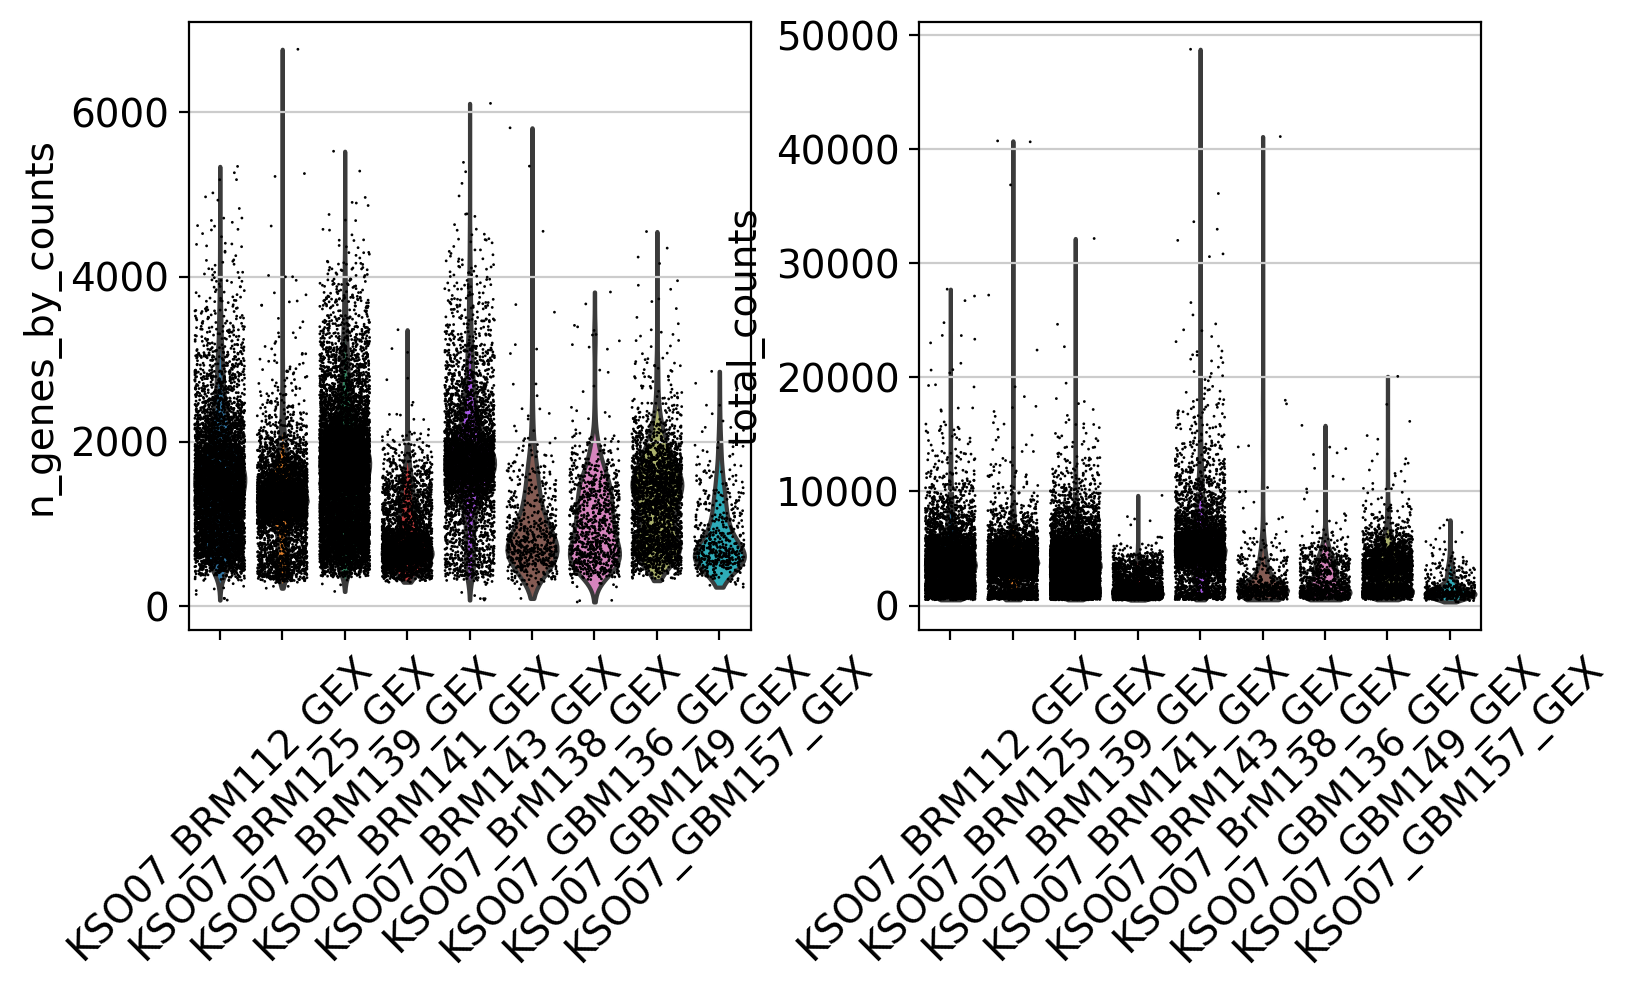

In [26]:
sc.set_figure_params(dpi=100)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

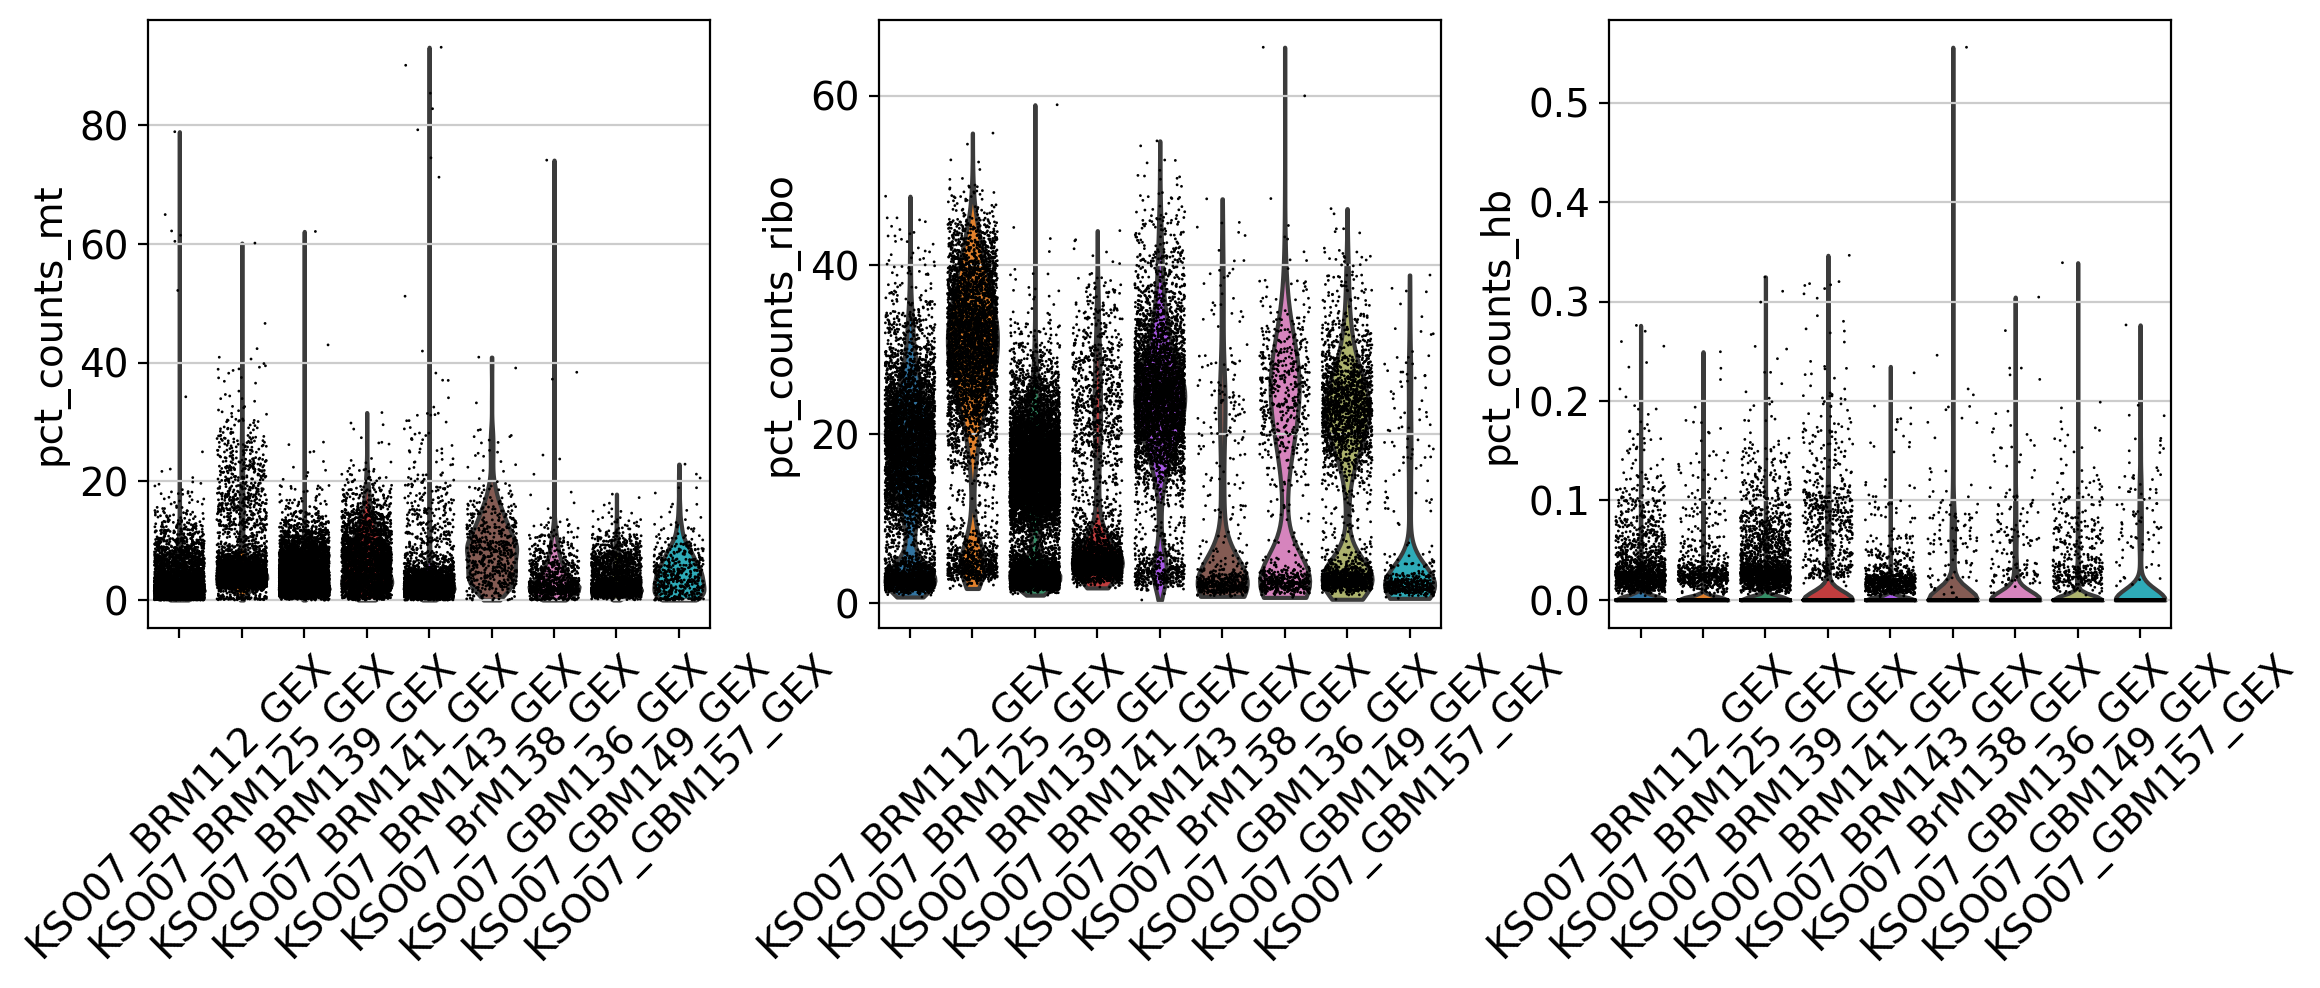

In [27]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

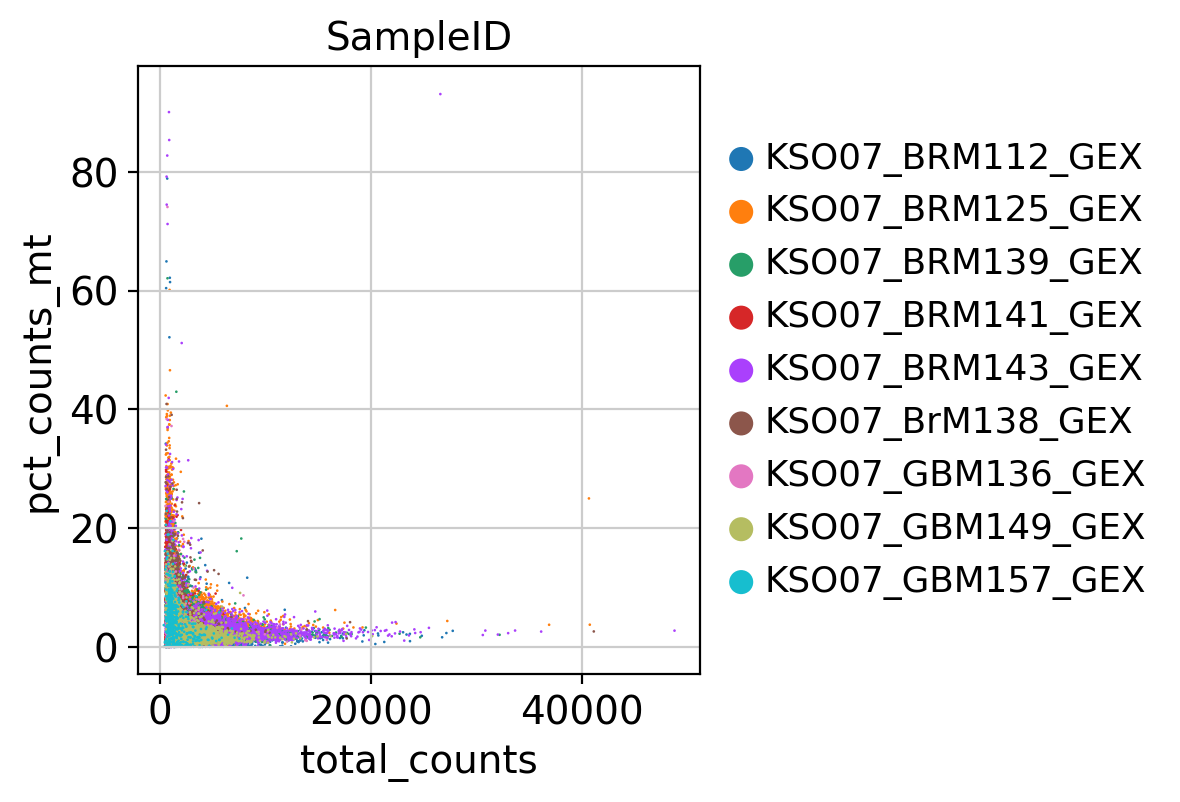

In [28]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="SampleID")

# Filtering

In [29]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

33107 21296


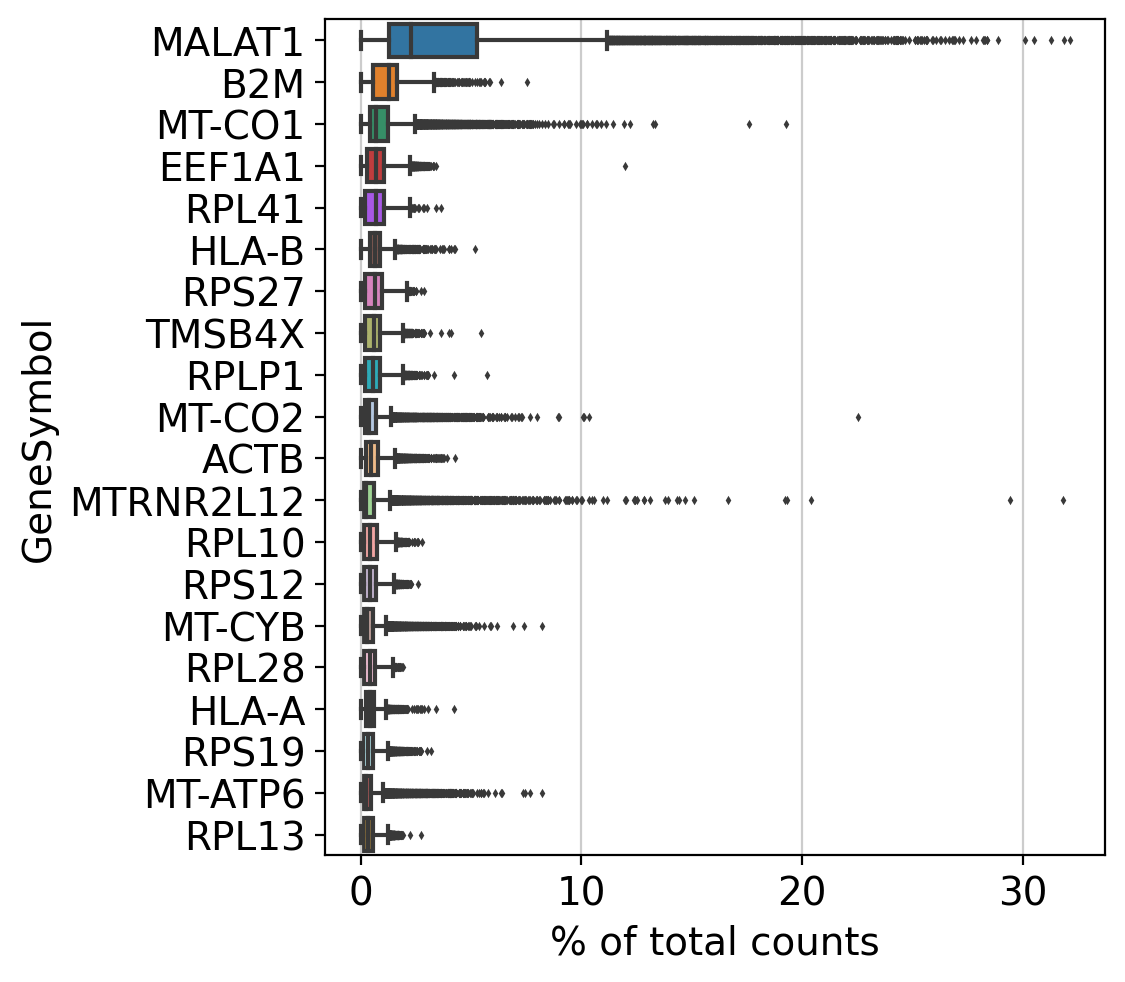

In [30]:
sc.pl.highest_expr_genes(adata, n_top=20)

# Mito/Ribo filtering

In [31]:
adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]
adata = adata[adata.obs['pct_counts_hb'] < 2, :]
print("Remaining cells %d"%adata.n_obs)

Remaining cells 24707


# Plot filtered QC

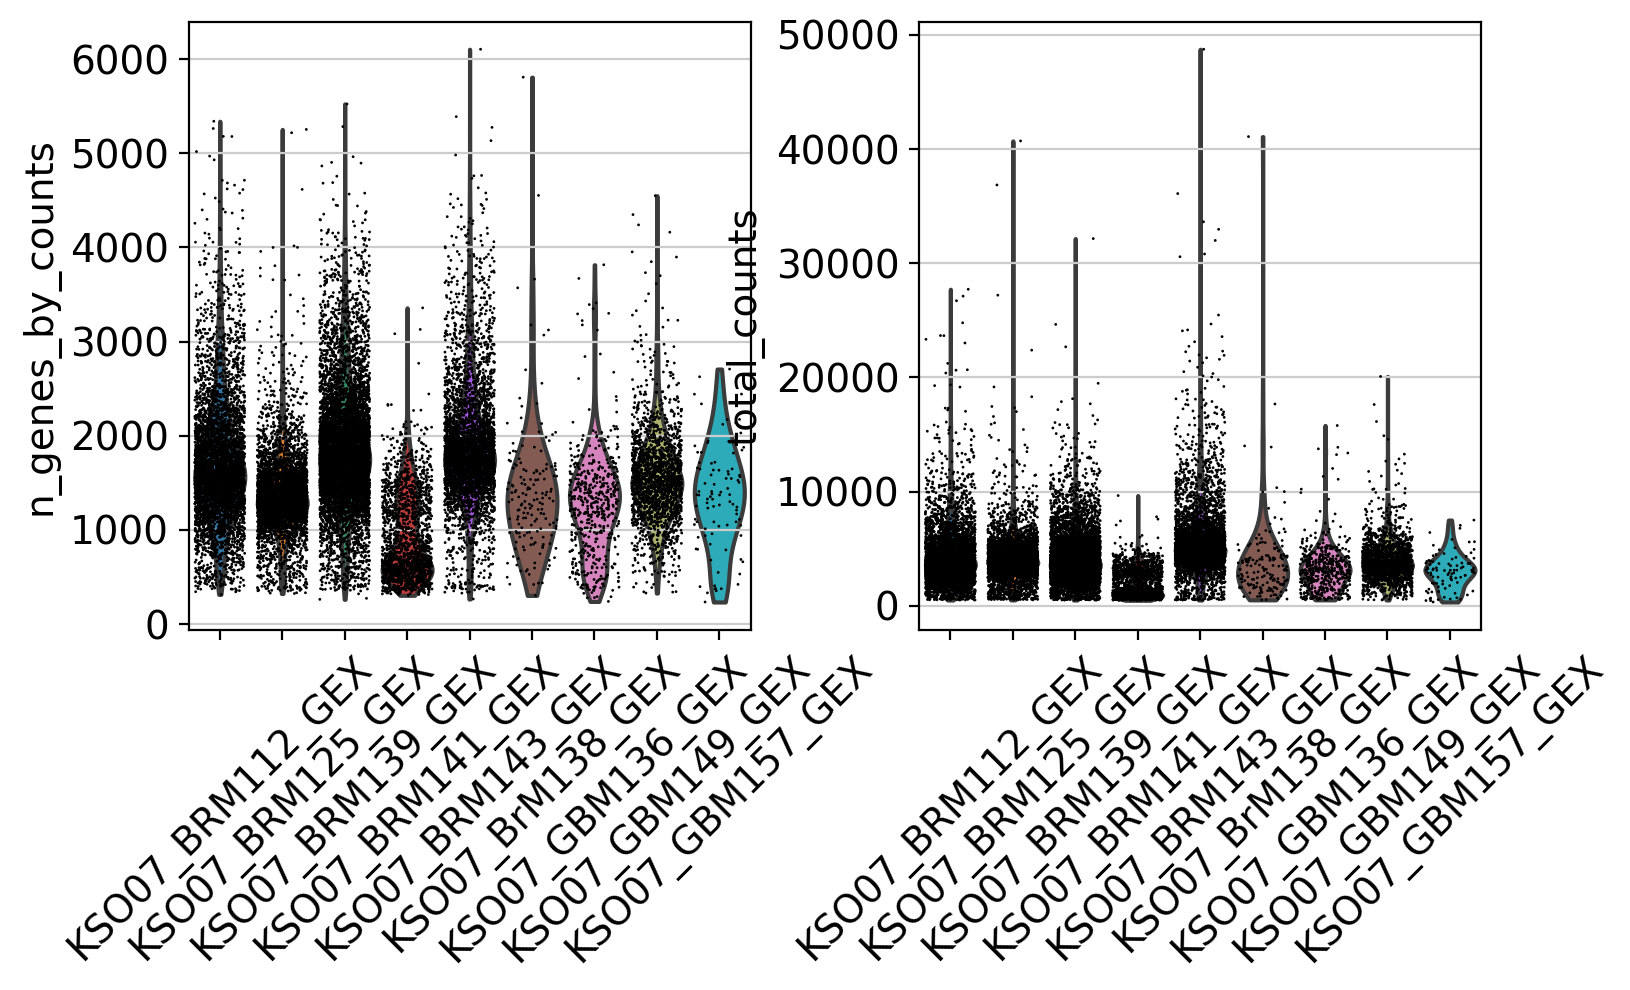

In [32]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

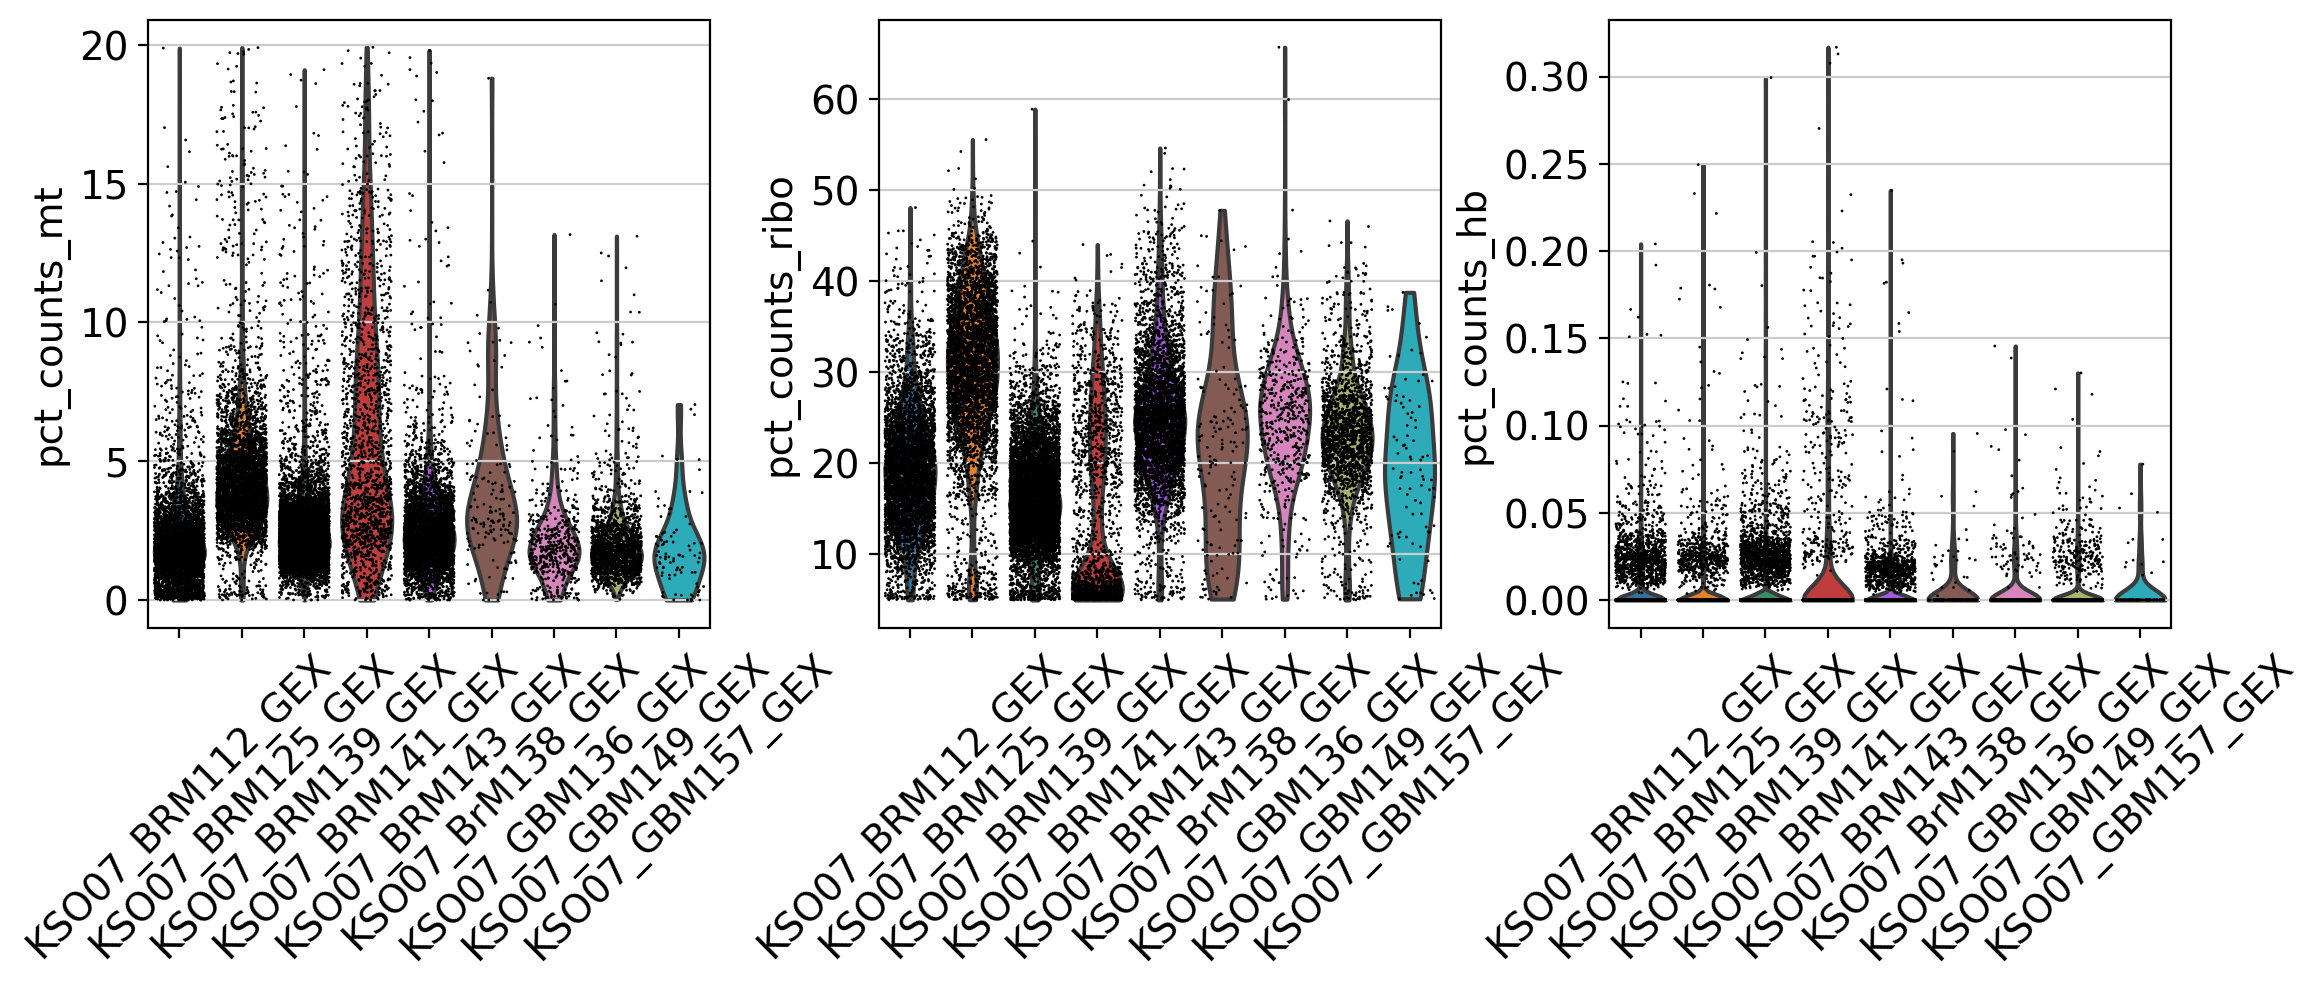

In [33]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

# Filter genes

In [34]:
mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")

In [35]:
mito_gene_indicator = np.in1d(adata.var_names, mito_gene_names)

In [36]:
adata = adata[:, ~mito_gene_indicator]

In [37]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(ribo_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

24707 21283
24707 21180


# Calculate cell-cycle scores

In [38]:
cell_cycle_genes = [x.strip() for x in open('/home/lugli/spuccio/Projects/SP035_TregIntegration/Analysis/regev_lab_cell_cycle_genes_homo.txt')]
print(len(cell_cycle_genes))
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

90
90


In [39]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

... storing 'phase' as categorical


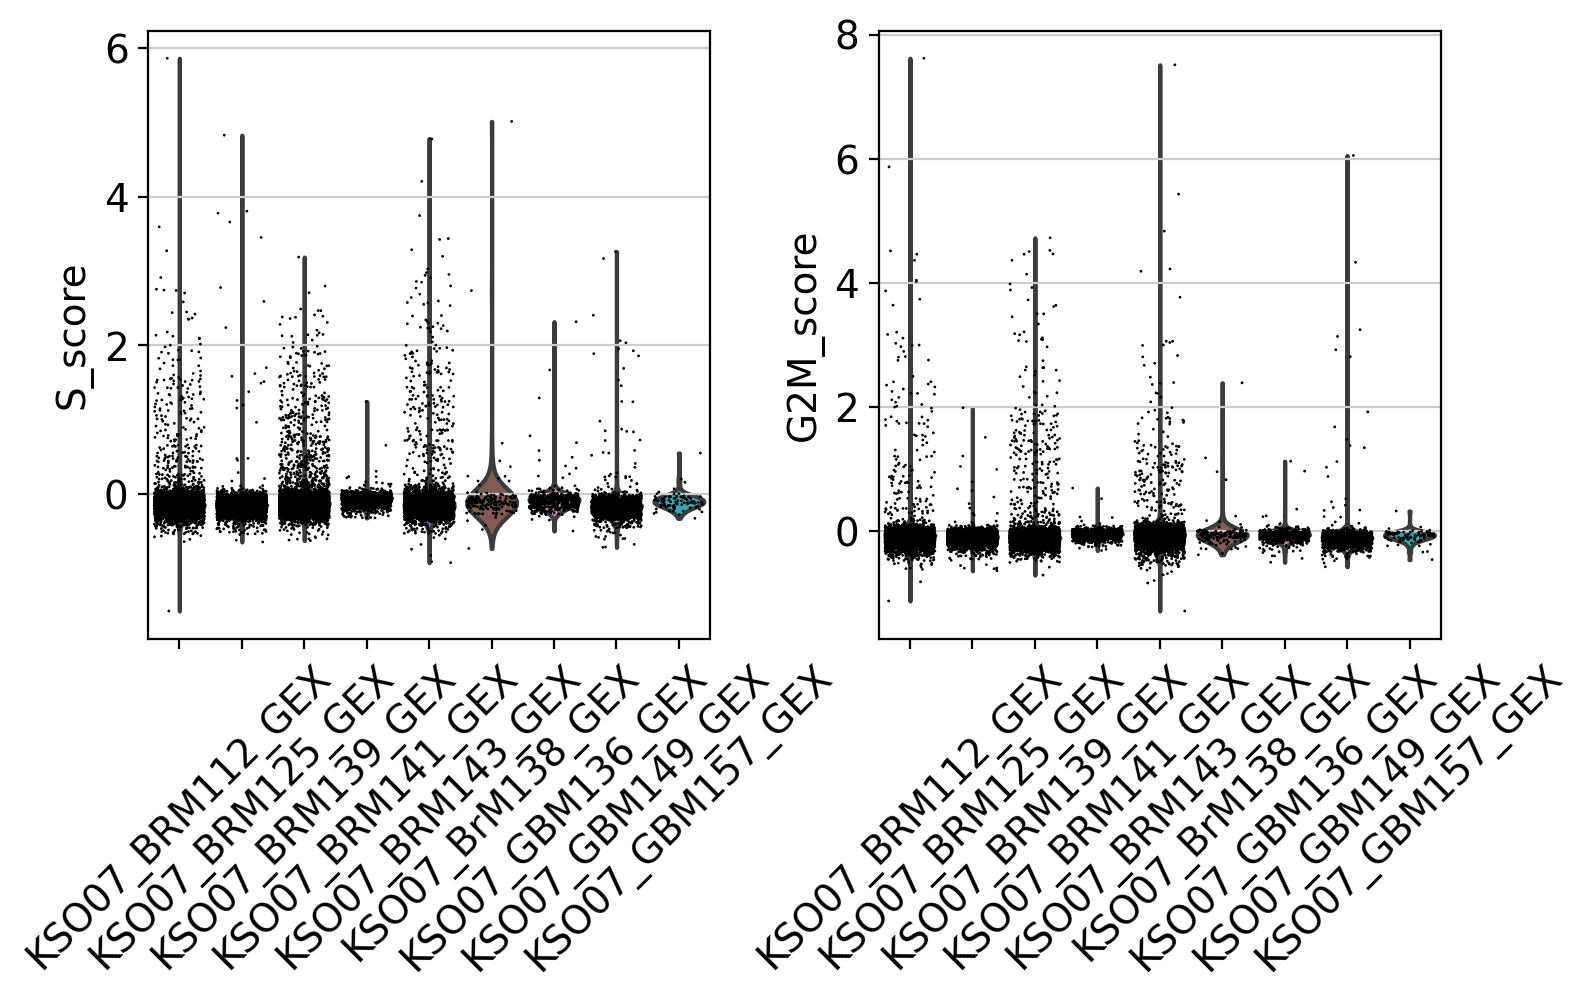

In [40]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'SampleID', rotation=45)

# Predict doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.79
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.1%
Elapsed time: 29.6 seconds


1

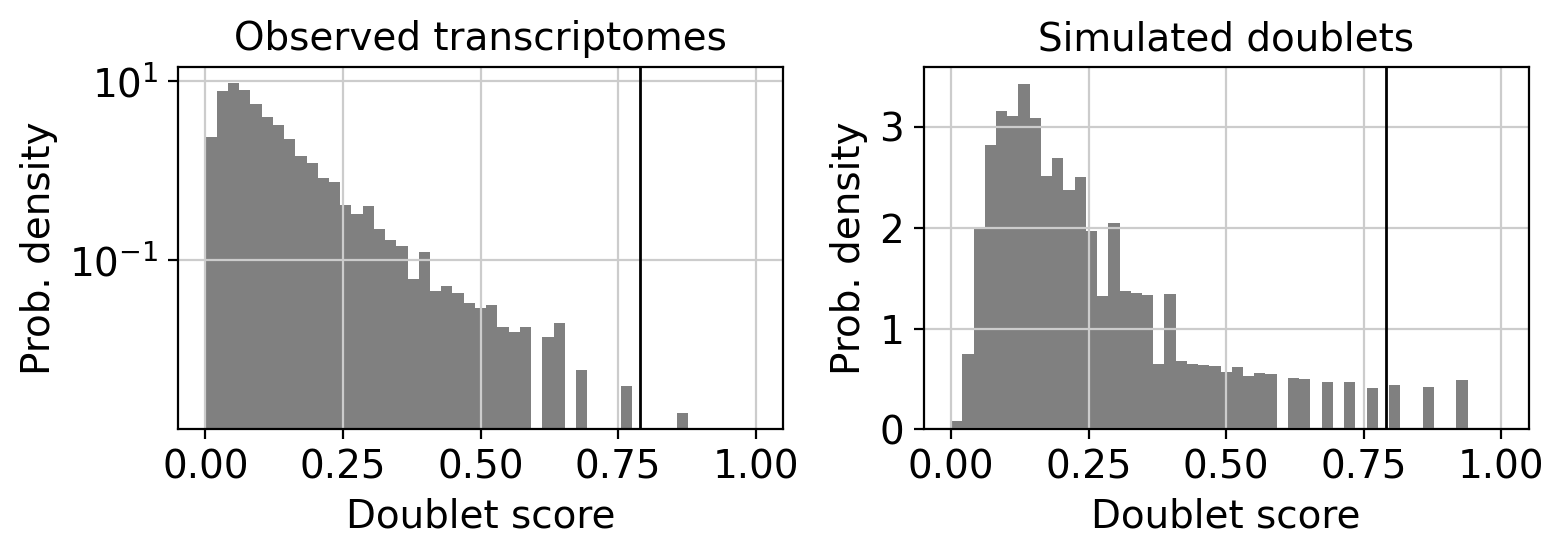

In [41]:
scrub = scr.Scrublet(adata.layers['raw'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [42]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


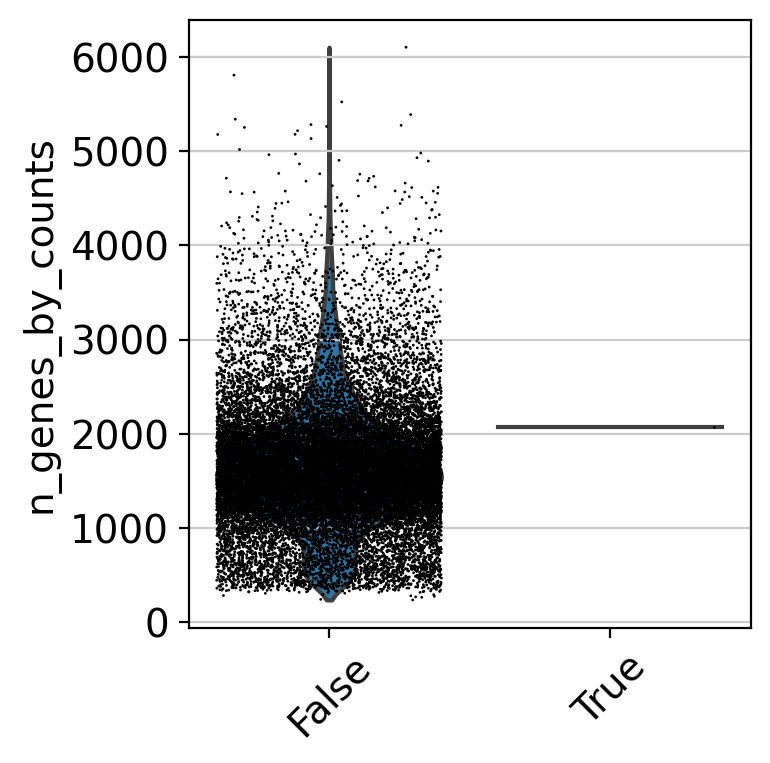

In [43]:
sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [44]:
adata = adata[adata.obs['doublet_info'] == "False",:]

# Processing 

In [45]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.layers['cpm'] = adata.X
# logaritmize
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Filter higly variable genes
#adata.raw = adata

# scale
#sc.pp.scale(adata)

# Celltypist classification

In [46]:
sc.tl.pca(adata,svd_solver='arpack',copy=False)

In [47]:
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=40)

2022-09-05 16:03:16.642715: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-05 16:03:16.833641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 16:03:16.833690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [48]:
sce.pp.harmony_integrate(adata, ['SampleID'])

2022-09-05 16:03:45,379 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2022-09-05 16:03:49,704 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2022-09-05 16:03:53,999 - harmonypy - INFO - Converged after 2 iterations
Converged after 2 iterations


In [49]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [50]:
sc.tl.umap(adata)

In [51]:
adata.obsm['X_umap_harmony'] = adata.obsm['X_umap']

In [52]:
adata

AnnData object with n_obs × n_vars = 24706 × 21180
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'ENSGeneID', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 'distances', 'connectivities'

In [53]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 12
📂 Storing models in /home/lugli/spuccio/.celltypist/data/models
💾 Downloading model [1/12]: Immune_All_Low.pkl
💾 Downloading model [2/12]: Immune_All_High.pkl
💾 Downloading model [3/12]: Adult_Mouse_Gut.pkl
💾 Downloading model [4/12]: COVID19_Immune_Landscape.pkl
💾 Downloading model [5/12]: Cells_Fetal_Lung.pkl
💾 Downloading model [6/12]: Cells_Intestinal_Tract.pkl
💾 Downloading model [7/12]: Cells_Lung_Airway.pkl
💾 Downloading model [8/12]: Developing_Mouse_Brain.pkl
💾 Downloading model [9/12]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [10/12]: Human_Lung_Atlas.pkl
💾 Downloading model [11/12]: Nuclei_Lung_Airway.pkl
💾 Downloading model [12/12]: Pan_Fetal_Human.pkl


In [54]:
model = models.Model.load(model = 'Immune_All_High.pkl')

In [55]:
predictionsHigh = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

🔬 Input data has 24706 cells and 21180 genes
🔗 Matching reference genes in the model
🧬 5474 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [56]:
#adata.obs['CellCount']= adata.obs['CellCount'].astype(int)

In [57]:
adata.obs['Sample'].value_counts()

Patient50    7302
Patient47    4754
Patient48    4222
Patient52    4102
Patient54    1825
Patient51    1729
Patient53     514
Patient49     165
Patient55      93
Name: Sample, dtype: int64

In [58]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_G_ImportDataFromJoyce.h5ad")

In [59]:
predictionsHigh.to_adata()

AnnData object with n_obs × n_vars = 24706 × 21180
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'ENSGeneID', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1

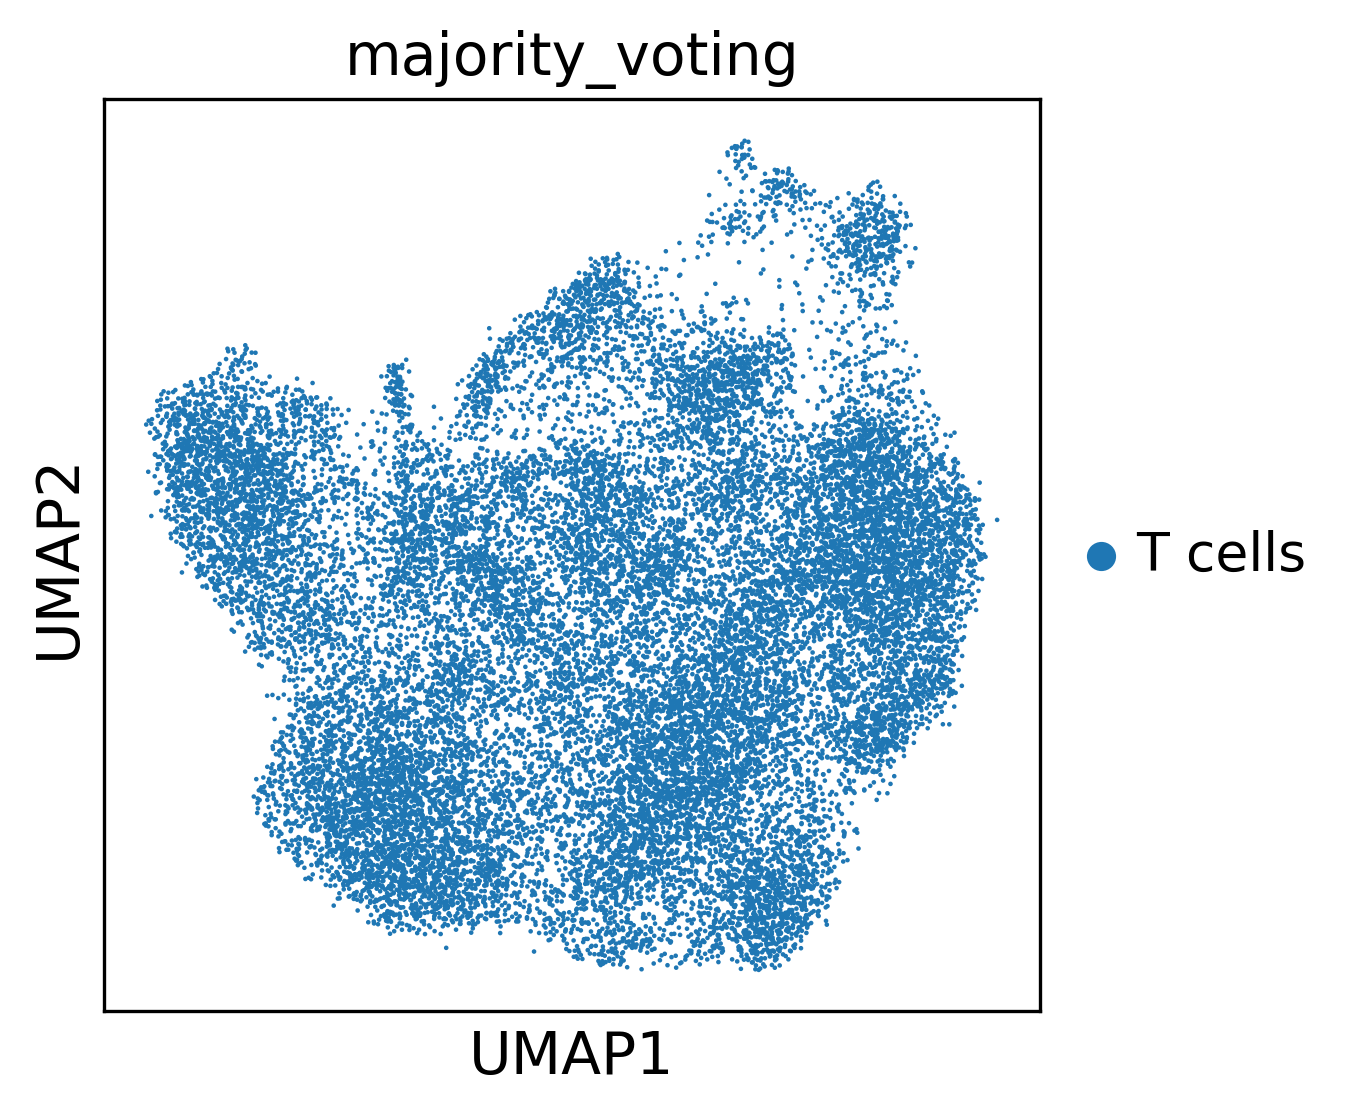

In [60]:
sc.set_figure_params(dpi=150)
sc.pl.umap(predictionsHigh.to_adata(), color='majority_voting')

# PanglaoDB classification

In [61]:
adata = adata[:, adata.var.highly_variable]

In [62]:
markers = dc.get_resource('PanglaoDB')
markers

label genesymbol canonical_marker         cell_type germ_layer human  \
0          CTRB1            False       Enterocytes   Endoderm  True   
1          CTRB1             True      Acinar cells   Endoderm  True   
2           KLK1             True      Acinar cells   Endoderm  True   
3           KLK1            False      Goblet cells   Endoderm  True   
4           KLK1            False  Epithelial cells   Mesoderm  True   
...          ...              ...               ...        ...   ...   
8472     SLC14A1             True  Urothelial cells   Mesoderm  True   
8473       UPK3A             True  Urothelial cells   Mesoderm  True   
8474       UPK1A             True  Urothelial cells   Mesoderm  True   
8475        UPK2             True  Urothelial cells   Mesoderm  True   
8476       UPK3B             True  Urothelial cells   Mesoderm  True   

label human_sensitivity human_specificity mouse mouse_sensitivity  \
0                   0.0        0.00439422  True        0.00331126   
1                   1.0       0.000628931  True          0.957143   
2              0.833333        0.00503145  True          0.314286   
3              0.588235        0.00503937  True          0.903226   
4                   0.0        0.00823306  True          0.225806   
...                 ...               ...   ...               ...   
8472                0.0         0.0181704  True               0.0   
8473                0.0               0.0  True               0.0   
8474                0.0               0.0  True               0.0   
8475                0.0               0.0  True               0.0   
8476                0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
0             0.0204803        9606         GI tract           0.017  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
3             0.0124084        9606         GI tract           0.013  
4             0.0137585        9606       Epithelium           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[8477 rows x 13 columns]

In [63]:
markers['organ'].value_counts()

Immune system         1775
Brain                 1589
GI tract               540
Kidney                 450
Reproductive           429
Connective tissue      413
Vasculature            372
Pancreas               365
Liver                  310
Epithelium             258
Blood                  247
Bone                   215
Lungs                  210
Skin                   172
Skeletal muscle        168
Olfactory system       136
Heart                  131
Smooth muscle          130
Eye                    122
Mammary gland           94
Zygote                  85
Embryo                  56
Placenta                28
Thymus                  27
Adrenal glands          25
Oral cavity             18
Thyroid                 14
Urinary bladder         11
Parathyroid glands      10
Name: organ, dtype: int64

In [64]:
# Filter by canonical_marker and human
markers = markers[(markers['human']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label genesymbol canonical_marker                     cell_type germ_layer  \
1          CTRB1             True                  Acinar cells   Endoderm   
2           KLK1             True                  Acinar cells   Endoderm   
5           KLK1             True               Principal cells   Mesoderm   
7           KLK1             True  Plasmacytoid dendritic cells   Mesoderm   
8           KLK1             True             Endothelial cells   Mesoderm   
...          ...              ...                           ...        ...   
8472     SLC14A1             True              Urothelial cells   Mesoderm   
8473       UPK3A             True              Urothelial cells   Mesoderm   
8474       UPK1A             True              Urothelial cells   Mesoderm   
8475        UPK2             True              Urothelial cells   Mesoderm   
8476       UPK3B             True              Urothelial cells   Mesoderm   

label human human_sensitivity human_specificity mouse mouse_sensitivity  \
1      True               1.0       0.000628931  True          0.957143   
2      True          0.833333        0.00503145  True          0.314286   
5      True               0.0        0.00814536  True          0.285714   
7      True               0.0        0.00820189  True               1.0   
8      True               0.0        0.00841969  True               0.0   
...     ...               ...               ...   ...               ...   
8472   True               0.0         0.0181704  True               0.0   
8473   True               0.0               0.0  True               0.0   
8474   True               0.0               0.0  True               0.0   
8475   True               0.0               0.0  True               0.0   
8476   True               0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
5             0.0140583        9606           Kidney           0.013  
7             0.0129136        9606    Immune system           0.013  
8             0.0149153        9606      Vasculature           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[5180 rows x 13 columns]

In [65]:
# Run leiden clustering algorithm
sc.tl.leiden(adata)

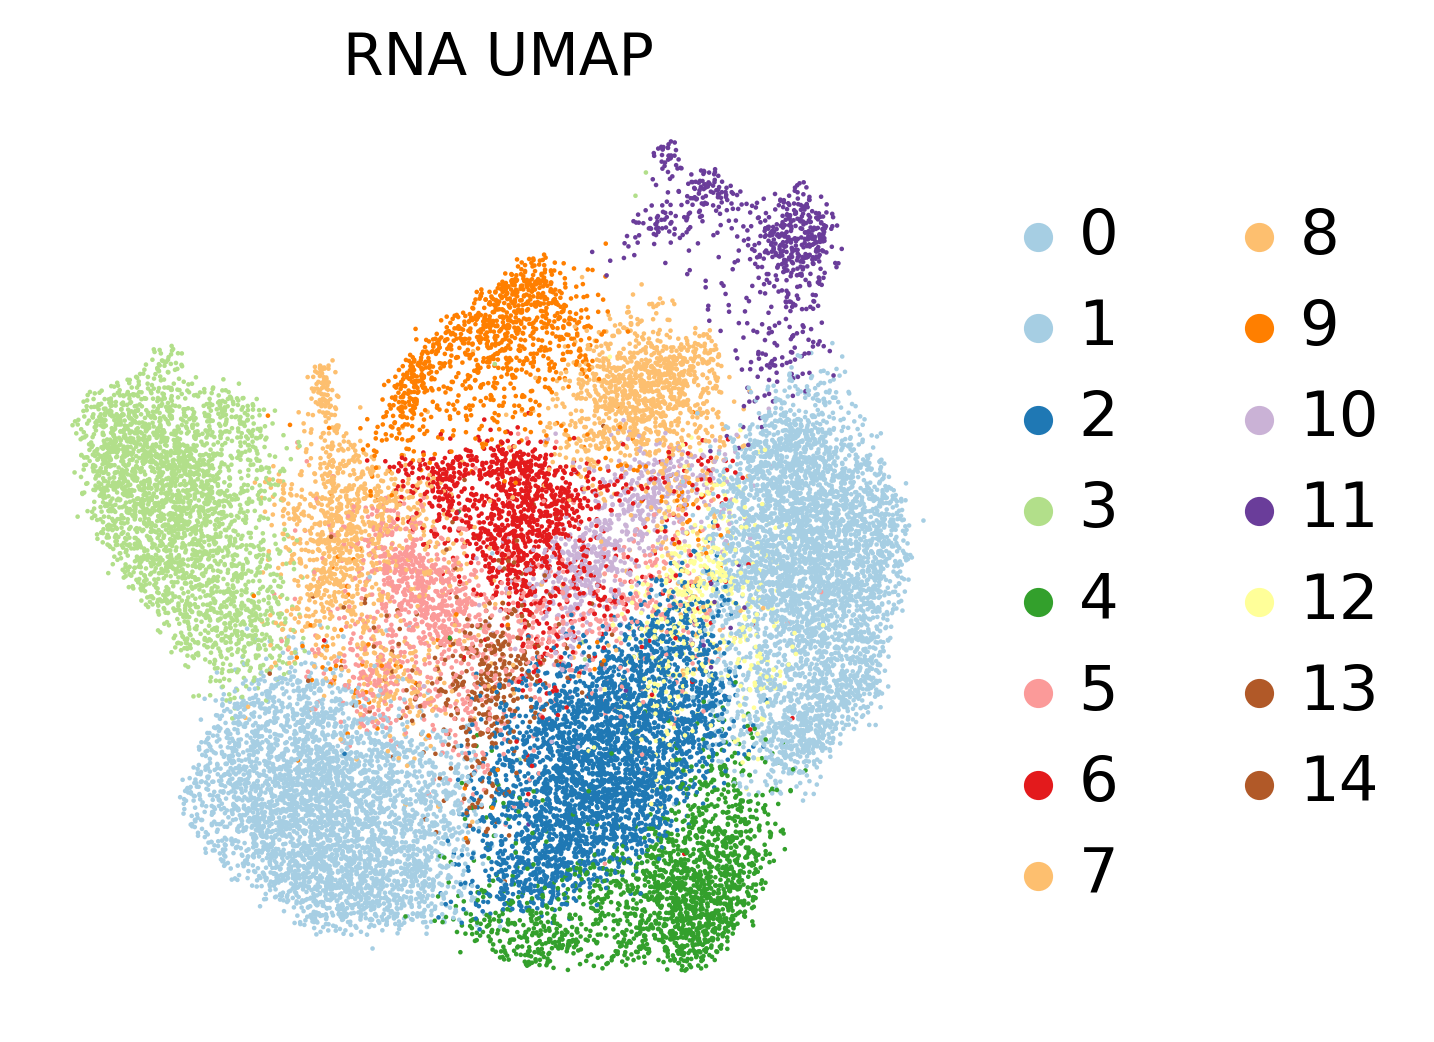

In [66]:
# Visualize
sc.pl.umap(adata, color='leiden', title='RNA UMAP',palette='Paired',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [67]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 24706 samples and 1950 targets for 88 sources.


100%|██████████| 24706/24706 [00:07<00:00, 3471.39it/s]


In [68]:
adata.obsm['ora_estimate']

source                Acinar cells  Adipocytes  Astrocytes   B cells  \
KSO07_BRM112_GEX-0            -0.0   -0.000000   -0.000000  3.077472   
KSO07_BRM112_GEX-1            -0.0    1.242177    1.319265  3.077472   
KSO07_BRM112_GEX-4            -0.0   -0.000000   -0.000000 -0.000000   
KSO07_BRM112_GEX-5            -0.0   -0.000000   -0.000000  1.363974   
KSO07_BRM112_GEX-6            -0.0    2.818395   -0.000000  1.363974   
...                            ...         ...         ...       ...   
KSO07_GBM157_GEX-504          -0.0   -0.000000    4.874419  1.363974   
KSO07_GBM157_GEX-505          -0.0    1.242177    2.981951  1.363974   
KSO07_GBM157_GEX-510          -0.0   -0.000000    1.319265  1.363974   
KSO07_GBM157_GEX-512          -0.0   -0.000000    1.319265  3.077472   
KSO07_GBM157_GEX-513          -0.0    2.818395    2.981951 -0.000000   

source                B cells memory  B cells naive  Basophils  Bergmann glia  \
KSO07_BRM112_GEX-0          1.363974       1.208460  -0.000000           -0.0   
KSO07_BRM112_GEX-1          1.363974       4.501878   1.536917           -0.0   
KSO07_BRM112_GEX-4          3.077472       4.501878   1.536917           -0.0   
KSO07_BRM112_GEX-5          1.363974       1.208460   1.536917           -0.0   
KSO07_BRM112_GEX-6          1.363974       2.747231   1.536917           -0.0   
...                              ...            ...        ...            ...   
KSO07_GBM157_GEX-504       -0.000000      -0.000000   3.453515           -0.0   
KSO07_GBM157_GEX-505        3.077472       4.501878   1.536917           -0.0   
KSO07_GBM157_GEX-510        1.363974       1.208460  -0.000000           -0.0   
KSO07_GBM157_GEX-512        1.363974       4.501878   1.536917           -0.0   
KSO07_GBM157_GEX-513       -0.000000      -0.000000   1.536917           -0.0   

source                Beta cells  Cardiomyocytes  ...  Satellite glial cells  \
KSO07_BRM112_GEX-0     -0.000000       -0.000000  ...              -0.000000   
KSO07_BRM112_GEX-1     -0.000000        1.319265  ...               1.536917   
KSO07_BRM112_GEX-4      1.615047       -0.000000  ...              -0.000000   
KSO07_BRM112_GEX-5     -0.000000        1.319265  ...               1.536917   
KSO07_BRM112_GEX-6     -0.000000        1.319265  ...              -0.000000   
...                          ...             ...  ...                    ...   
KSO07_GBM157_GEX-504    1.615047        2.981951  ...              -0.000000   
KSO07_GBM157_GEX-505   -0.000000        1.319265  ...              -0.000000   
KSO07_GBM157_GEX-510   -0.000000        1.319265  ...              -0.000000   
KSO07_GBM157_GEX-512   -0.000000       -0.000000  ...              -0.000000   
KSO07_GBM157_GEX-513   -0.000000        2.981951  ...               1.536917   

source                Schwann cells  Sertoli cells  Smooth muscle cells  \
KSO07_BRM112_GEX-0        -0.000000       1.536917             1.278919   
KSO07_BRM112_GEX-1        -0.000000       1.536917            -0.000000   
KSO07_BRM112_GEX-4        -0.000000      -0.000000             1.278919   
KSO07_BRM112_GEX-5        -0.000000      -0.000000            -0.000000   
KSO07_BRM112_GEX-6        -0.000000       1.536917             1.278919   
...                             ...            ...                  ...   
KSO07_GBM157_GEX-504       1.471021       1.536917            -0.000000   
KSO07_GBM157_GEX-505      -0.000000       1.536917            -0.000000   
KSO07_GBM157_GEX-510       1.471021       1.536917            -0.000000   
KSO07_GBM157_GEX-512      -0.000000       1.536917            -0.000000   
KSO07_GBM157_GEX-513       3.308777       3.453515             2.896188   

source                  T cells  T helper cells  T regulatory cells  \
KSO07_BRM112_GEX-0     8.828101       -0.000000            2.981951   
KSO07_BRM112_GEX-1    10.753614       -0.000000           -0.000000   
KSO07_BRM112_GEX-4     6.997408       -0.000000           -0.000000   
KSO07_BRM112_GEX

In [69]:
adata.obsm['ora_estimate'].columns

Index(['Acinar cells', 'Adipocytes', 'Astrocytes', 'B cells', 'B cells memory',
       'B cells naive', 'Basophils', 'Bergmann glia', 'Beta cells',
       'Cardiomyocytes', 'Cholangiocytes', 'Chondrocytes', 'Chromaffin cells',
       'Crypt cells', 'Delta cells', 'Dendritic cells', 'Ductal cells',
       'Embryonic stem cells', 'Endothelial cells', 'Enterocytes',
       'Eosinophils', 'Ependymal cells', 'Epsilon cells', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma (PP) cells', 'Gamma delta T cells', 'Germ cells', 'Glomus cells',
       'Hematopoietic stem cells', 'Hepatic stellate cells', 'Hepatocytes',
       'Immature neurons', 'Keratinocytes', 'Kupffer cells',
       'Langerhans cells', 'Leydig cells', 'Loop of Henle cells',
       'Luminal epithelial cells', 'Macrophages', 'Mammary epithelial cells',
       'Mast cells', 'Megakaryocytes', 'Melanocytes', 'Merkel cells',
       'Mesangial cells', 'Microfold cells', 'Microglia', 

In [70]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 24706 × 88
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'ora_estimate', 'ora_pvals'

In [71]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
mean_enr

Dendritic cells  Fibroblasts  Gamma delta T cells  Monocytes   NK cells  \
0          4.651841     2.404053            11.307508   2.042513  18.922382   
1          2.463988     3.531235             2.287745   1.174130   4.213407   
10         3.985793     3.255054             8.132687   1.301898  14.056345   
11         4.827651     2.203505            21.752010   2.269806  13.276145   
12         4.587804     2.079564             8.719040   5.725307  15.536805   
13         2.252711     2.328199             3.898440   1.402583   7.205554   
14         1.992605     6.009943             2.890329   0.793712   8.547664   
2          4.339202     3.026217             5.989344   1.269680  12.504606   
3          2.825888     2.040489             1.699527   2.163704   2.847357   
4          3.958621     3.548887             9.872703   1.244779  16.195791   
5          1.943284     2.677443             2.445128   0.854539   5.382497   
6          3.044864     1.914459             6.777463   1.087076  12.340735   
7          1.709902     3.067478             2.402701   1.058219   3.600019   
8          2.970660     2.408947             6.321901   1.896653  11.776396   
9          2.286106     2.046999             4.473127   2.044705   6.449778   

      T cells  
0   10.049370  
1    7.838094  
10   8.583928  
11   8.529099  
12  10.476501  
13   7.981713  
14   6.529682  
2    9.882295  
3    7.590187  
4    9.152812  
5    5.047794  
6    7.821751  
7    5.128289  
8    7.897093  
9    7.328783

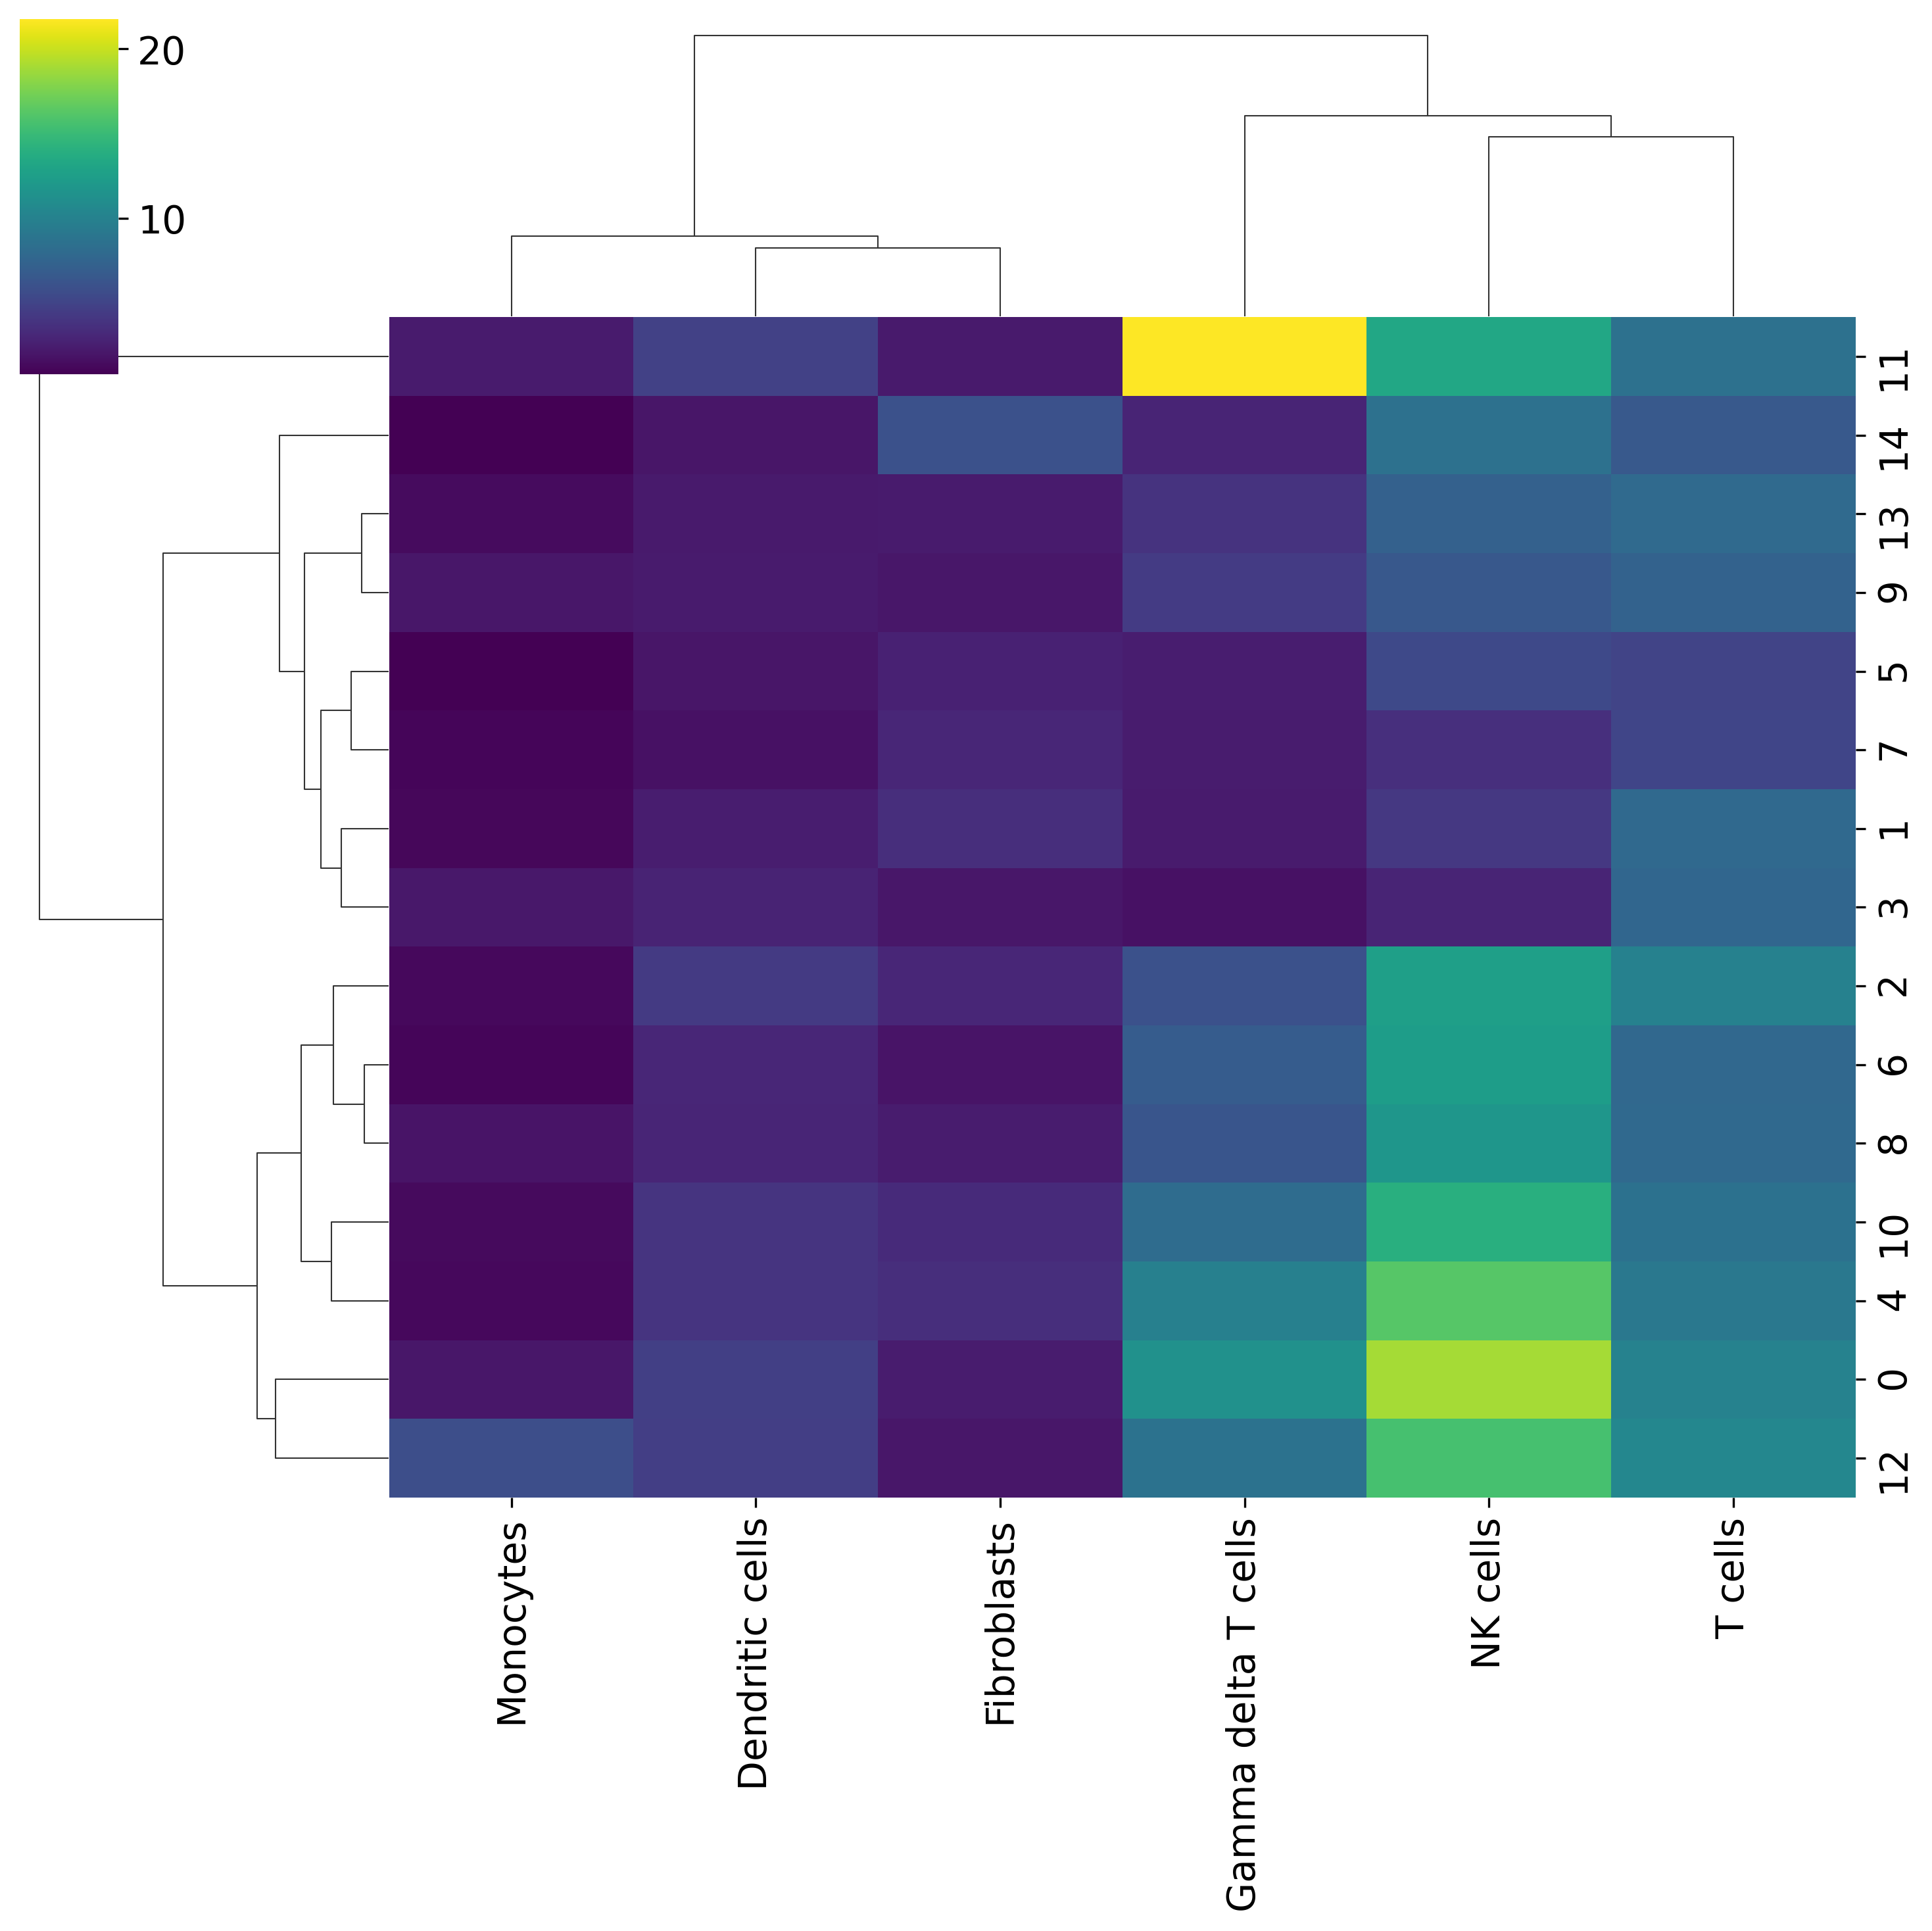

In [72]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [73]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'NK cells',
 '1': 'T cells',
 '10': 'NK cells',
 '11': 'Gamma delta T cells',
 '12': 'NK cells',
 '13': 'T cells',
 '14': 'NK cells',
 '2': 'NK cells',
 '3': 'T cells',
 '4': 'NK cells',
 '5': 'NK cells',
 '6': 'NK cells',
 '7': 'T cells',
 '8': 'NK cells',
 '9': 'T cells'}

... storing 'cell_type' as categorical


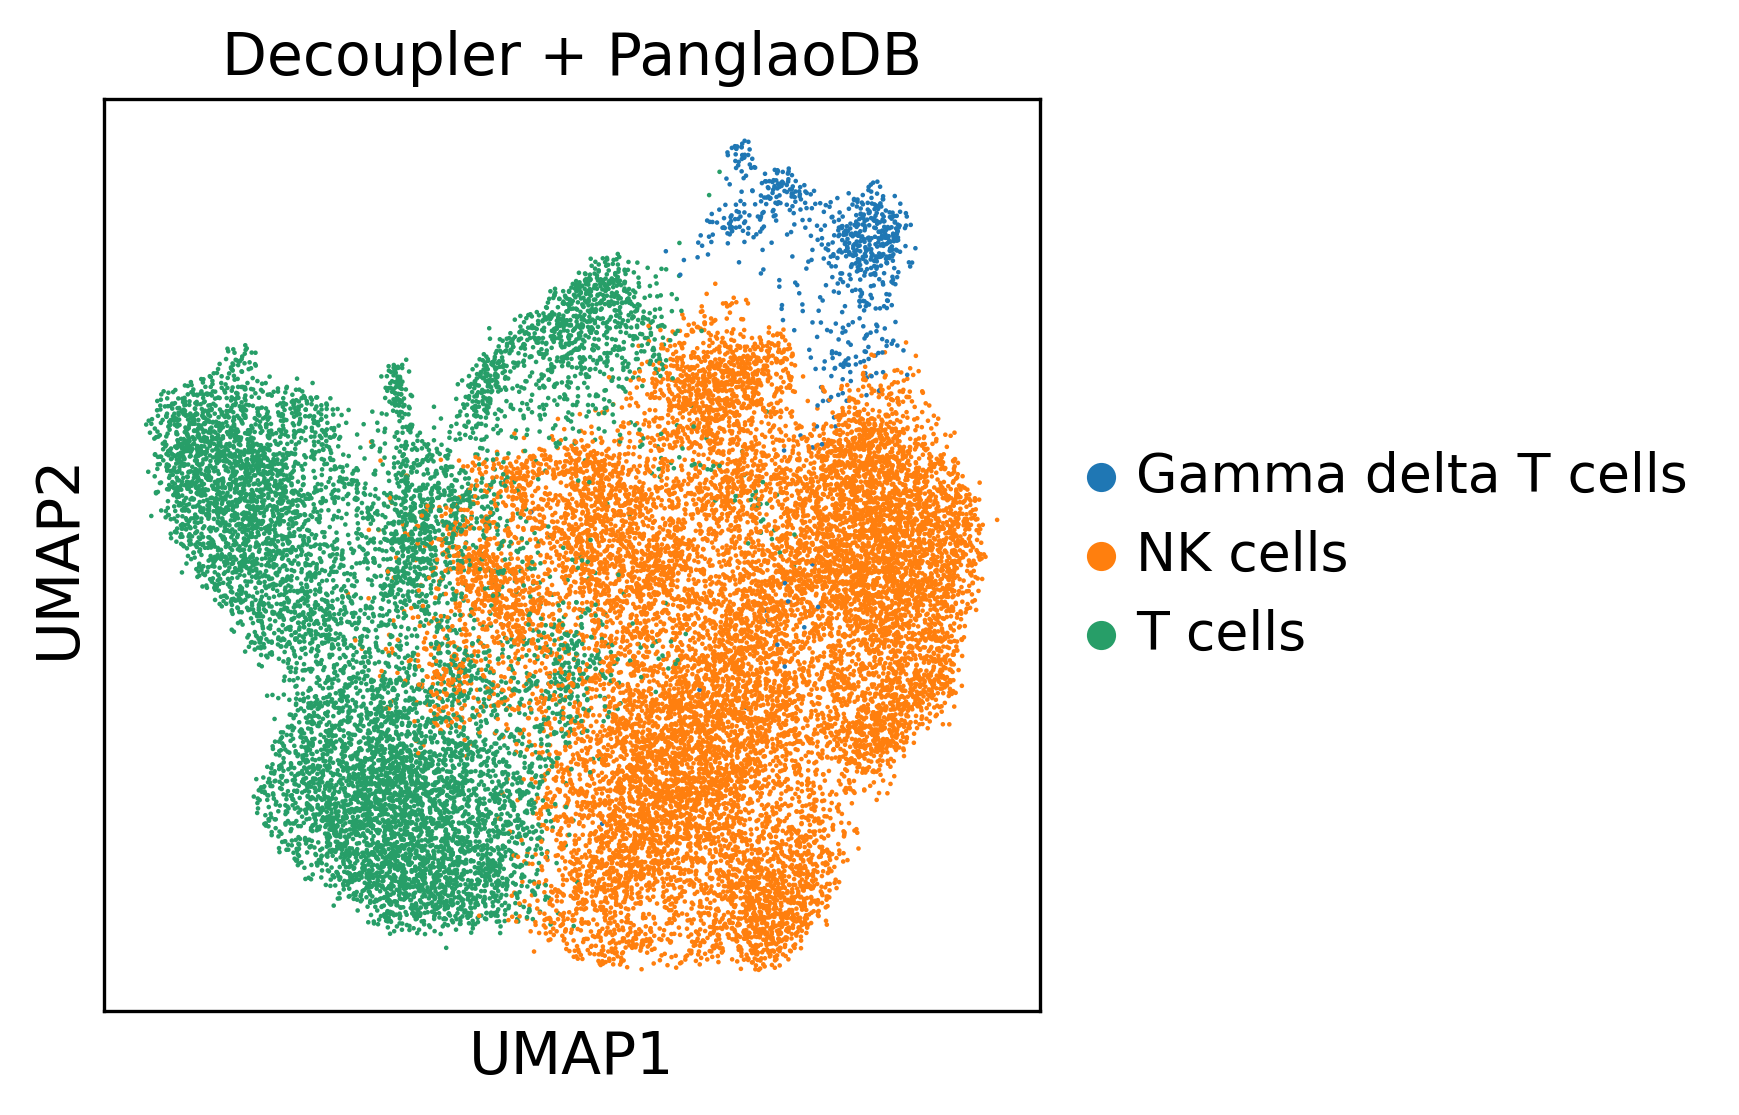

In [74]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type',title='Decoupler + PanglaoDB')

In [75]:
adata

AnnData object with n_obs × n_vars = 24706 × 1950
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden', 'cell_type'
    var: 'ENSGeneID', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca

In [76]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_G_ImportDataFromJoyce.h5ad")